In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Why k-means clustering?

We explored a critical issue in hierarchical clustering which is runtime. K-means clustering allows you to cluster large datasets in a fraction of the time.

To perform K-Means clustering in scipy, there are two steps involved-

- generate the cluster centers and 
- then assign the cluster labels. 


In [3]:
x = [17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 
     84, 87, 83, 90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27, 17, 17]

y = [4, 6, 0, 0, 4, 3, 1, 6, 5, 4, 6, 10, 8, 10, 97, 94, 99, 95, 
     95, 97, 99, 99, 94, 99, 90, 98, 100, 93, 98, 15, 10, 0, 10, 7, 17, 15]

## A list of 20 points with x and y coordinates is stored in a dataframe.

comic_con = pd.DataFrame({"x_coordinate": x, 'y_coordinate':y})

<AxesSubplot:xlabel='x_coordinate', ylabel='y_coordinate'>

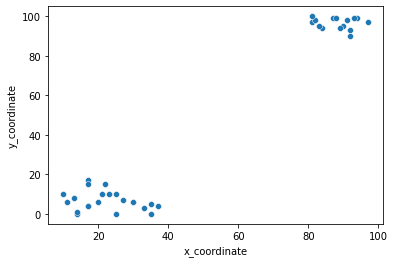

In [4]:
## First visualize this points for gaining insights

sns.scatterplot(x="x_coordinate", y='y_coordinate', data=comic_con)

In [5]:
# Import the whiten function
from scipy.cluster.vq import whiten

In [6]:
comic_con['x_scaled'] = whiten(comic_con["x_coordinate"])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])
comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000
3,14,0,0.419464,0.000000
4,37,4,1.108583,0.090010


In [25]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

#### K-means clustering in SciPy

K-means clustering is implemented using methods `kmeans` and `vq` of scipy-dot-cluster-dot-vq.

#### Step 1: Generate cluster centers:

The first step is performed by the kmeans method. There are five arguments for this method. 

`kmeans(obs, k_or_guess, iter, thresh, check_finite)`

1. The first argument is the list of `observations`, which have been standardized through the whiten method. 

2. The second argument, `k_or_guess`, is the number of clusters. 

3. The next argument is the `number of iterations` of the algorithm to perform. Its default value is 20. 

4. The fourth argument is the `threshold`. The idea behind this argument is that the algorithm is terminated if the change in distortion since the last k-means iteration is less than or equal to the threshold. Its default value is 10 raised to the power minus 5, or 0-point-00001. 

5. The last argument is a boolean value indicating if a check needs to be performed on the data for the presence of infinite or NaN values. The default value is True, which ensures that data points with NaN or infinite values are not considered for classification, which ensures that the results are accurate and unbiased. 

The k-means function returns two arguments, the cluster centers and distortion. 

- The `cluster centers`, is also known as the `code book`. You will notice that k-means runs really quickly as compared to hierarchical clustering as the number of operations is considerably less in k-means clustering.

- The `distortion` is calculated as the sum of square of distances between the data points and cluster centers. 

In [8]:
# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[["x_scaled", "y_scaled"]], 2)

In [9]:
cluster_centers

array([[0.66058434, 0.15108795],
       [2.64462017, 2.17073744]])

`kmeans` returns a single value of distortions based on the overall data.

In [10]:
distortion

0.20140463751291524

#### Step 2: Generate cluster labels

The next step is to use the vq method to generate cluster labels. It takes three arguments. 

`vq(obs, cluster_centers, check_finite=True)`

1. The first argument is the list of observations, which have been standardized through the whiten method. 

2. The second argument is the code book or cluster_centers, that is the first output of the kmeans method. 

3. The third optional argument is check_finite, a boolean value indicating if a check needs to be performed on the data for the presence of infinite or NaN values. By default, its value is set to True. The function returns the cluster labels, also known as the "code book index" and the distortion.

vq Returns two objects:

- a list of cluster labels, 
- a list of distortions

In [11]:
# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[["x_scaled", "y_scaled"]], cluster_centers)

`vq` returns a list of distortions, one for each data point. The mean of the list of distortions from the vq method should approximately equal the distortion value of the kmeans method if the same list of observations is passed.

In [12]:
distortion_list

array([0.16310319, 0.06342074, 0.41644944, 0.28454635, 0.45214327,
       0.33862882, 0.27326413, 0.23880845, 0.38998801, 0.16310319,
       0.33139556, 0.0803235 , 0.27262165, 0.36846165, 0.21805227,
       0.13936688, 0.06848377, 0.16121275, 0.06153324, 0.26194067,
       0.18099237, 0.05756342, 0.05969664, 0.15284721, 0.18353986,
       0.19090402, 0.23178523, 0.13637203, 0.08886707, 0.18645442,
       0.07925196, 0.17507842, 0.11528883, 0.14852102, 0.2764833 ,
       0.24007359])

In [21]:
comic_con["cluster_labels"].value_counts()

0    21
1    15
Name: cluster_labels, dtype: int64

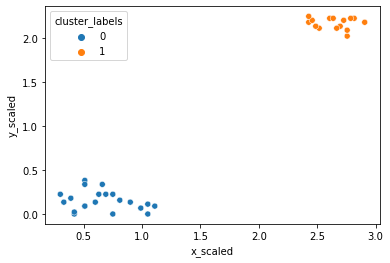

In [14]:
# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

In [15]:
import timeit

In [18]:
%timeit kmeans(comic_con[["x_scaled", "y_scaled"]], 2)

4.02 ms ± 184 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### How many clusters?

One critique of k-means clustering is that there is no right way of finding out how many clusters exist in your dataset. There are certain indicative methods, and one such method is : constructing an elbow plot to decide the right number of clusters for your dataset.

#### Distortions revisited

Recall our discussion on distortions, The distortion is the sum of the squares of distances between each data point and its cluster center. Ideally, distortion has an inverse relationship with the number of clusters - which means that distortion decreases with increasing number of clusters. 

This trend is intuitive - as segmenting the data into smaller fragments will lead to clusters being closer together, leading to a lower distortion This is the underlying logic of the elbow method, which is a line plot between the number of clusters and their corresponding distortions.

####  Elbow method

We first run k-means clustering with a varying number of clusters on the data, and construct an elbow plot, which has the number of clusters on the x-axis and distortion on the y-axis. The number of clusters can start from one to the number of data points. The ideal point is one beyond which the distortion decreases relatively less on increasing the number of clusters.

#### Elbow method on distinct clusters
Let us use the comic con data set to see how the elbow plot looks on a data set with distinct, well-defined clusters.


In [22]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[["x_scaled", "y_scaled"]], i)
    distortions.append(distortion)


In [23]:
# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
elbow_plot.head()

,num_clusters,distortions
0,1,1.389339
1,2,0.201405
2,3,0.149881
3,4,0.124609
4,5,0.100937


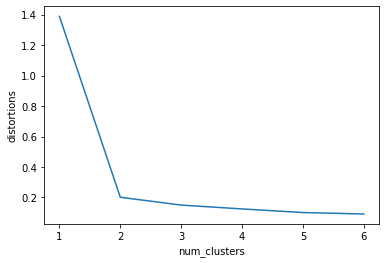

In [24]:
# Create a line plot of num_clusters and distortions
sns.lineplot(x="num_clusters", y="distortions", data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

#### Impact of seeds on distinct clusters

You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise, you will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.

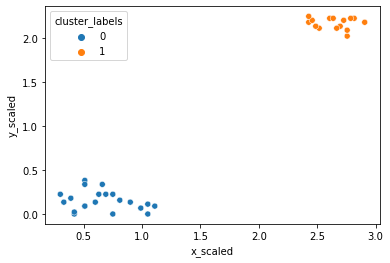

In [26]:
# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

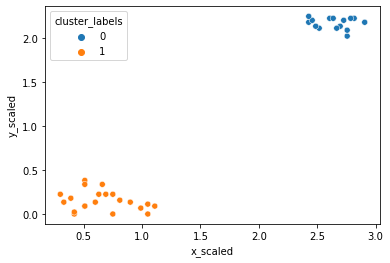

In [27]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

#### FIFA 18: defenders revisited

In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

- defending: a number which signifies the defending attributes of a player
- physical: a number which signifies the physical attributes of a player

These are typically defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

In [31]:
df = pd.read_csv("fifa_18_sample_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 185 entries, ID to prefers_gk
dtypes: bool(92), float64(32), int64(48), object(13)
memory usage: 816.5+ KB


In [32]:
df["def"]

0      33
1      26
2      30
3      42
4      60
       ..
995    75
996    75
997    63
998    35
999    17
Name: def, Length: 1000, dtype: int64

In [33]:
df["phy"]

0      80
1      61
2      60
3      81
4      91
       ..
995    71
996    81
997    73
998    77
999    50
Name: phy, Length: 1000, dtype: int64

In [46]:
fifa = pd.DataFrame(df[["def","phy"]])
fifa.head()

,def,phy
0,33,80
1,26,61
2,30,60
3,42,81
4,60,91


In [47]:
# Import the whiten function
from scipy.cluster.vq import whiten

In [48]:
fifa['scaled_def'] = whiten(fifa["def"])
fifa['scaled_phy'] = whiten(fifa["phy"])
fifa.head()

,def,phy,scaled_def,scaled_phy
0,33,80,1.649258,9.374085
1,26,61,1.299416,7.147740
2,30,60,1.499326,7.030564
3,42,81,2.099056,9.491261
4,60,91,2.998652,10.663022


In [50]:
# Set up a random seed in numpy
random.seed([1000,2000])

In [51]:
# Fit the data into a k-means algorithm
cluster_centers,distortion = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)


In [52]:
# Assign cluster labels
fifa['cluster_labels'], distortion_list = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)


In [53]:
# Display cluster centers 
fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean()

,scaled_def,scaled_phy
cluster_labels,,
0,1.948298,7.163234
1,3.817844,9.020452
2,2.072803,9.066327


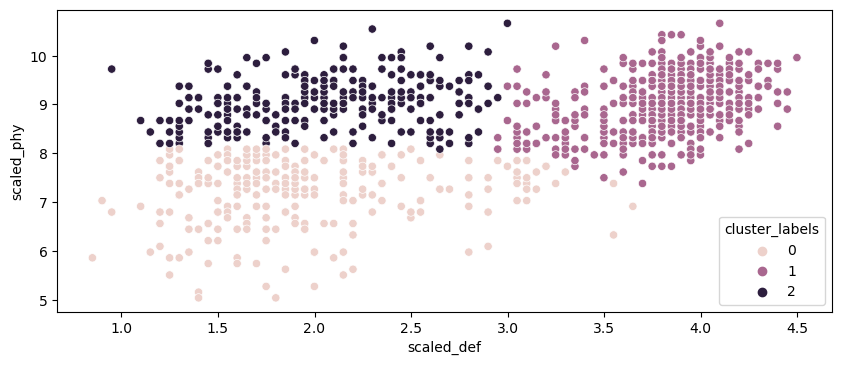

In [55]:
# Create a scatter plot through seaborn
plt.figure(figsize=(10,4), dpi = 100)
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()

In [56]:
cluster_centers_sd = fifa['scaled_def'].groupby(fifa["cluster_labels"]).mean()
cluster_centers_sd

cluster_labels
0    1.948298
1    3.817844
2    2.072803
Name: scaled_def, dtype: float64

In [57]:
cluster_centers_sp = fifa['scaled_phy'].groupby(fifa["cluster_labels"]).mean()
cluster_centers_sp

cluster_labels
0    7.163234
1    9.020452
2    9.066327
Name: scaled_phy, dtype: float64

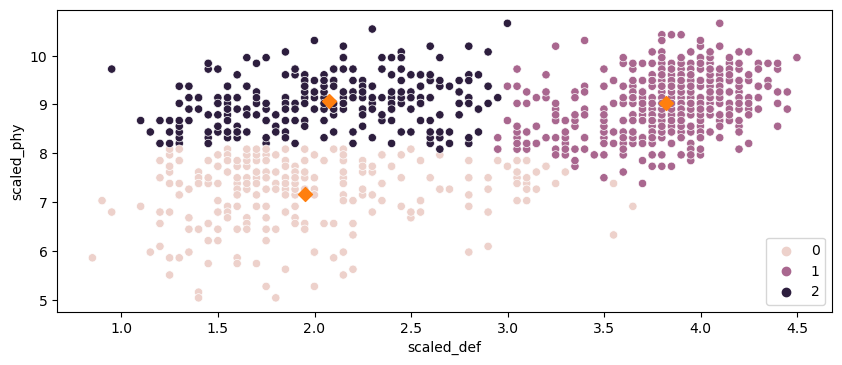

In [58]:
# Display cluster centers of each cluster

plt.figure(figsize=(10,4), dpi = 100)
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.scatter(cluster_centers_sd,cluster_centers_sp, marker = "D", s = 50)

plt.legend()
plt.show()